In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import joblib
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('zameen-updated.csv')
df.columns = df.columns.str.strip()  # strip column name spaces
df.head()


,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,02-04-2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,05-04-2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,07-17-2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,04-05-2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,07-10-2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [3]:
df = df[df['price'] > 0]
df = df[df['baths'] >= 0]
df = df[df['bedrooms'] >= 0]
df = df[(df['latitude'].between(-90, 90)) & (df['longitude'].between(-180, 180))]
df['agency'].fillna('Unknown', inplace=True)
df['agent'].fillna('Unknown', inplace=True)
df.drop_duplicates(inplace=True)


In [4]:
# Convert Area to square feet
def convert_area(area):
    if isinstance(area, str):
        area = area.replace(',', '')
        if 'marla' in area.lower():
            return float(area.split()[0]) * 272.25
        elif 'kanal' in area.lower():
            return float(area.split()[0]) * 20 * 272.25
        elif 'square feet' in area.lower():
            return float(area.split()[0])
    return np.nan

df['area'] = df['area'].apply(convert_area)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['house_age'] = datetime.datetime.now().year - df['date_added'].dt.year
df['house_age'].fillna(df['house_age'].median(), inplace=True)


In [5]:
# Encode necessary categorical columns
label_cols = ['property_type', 'location', 'city', 'province_name', 'purpose']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [6]:
features = ['area', 'bedrooms', 'baths', 'house_age', 'latitude', 'longitude',
            'property_type', 'location', 'city', 'province_name', 'purpose']

X = df[features]
y = df['price']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [9]:
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Performance:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R2 Score:", r2_score(y_true, y_pred))
    accuracy = 100 - (mean_absolute_error(y_true, y_pred) / y_true.mean() * 100)
    print(f"Approx Accuracy: {accuracy:.2f}%\n")

evaluate_model("Linear Regression", y_test, lr_model.predict(X_test))
evaluate_model("Random Forest", y_test, rf_model.predict(X_test))
evaluate_model("Gradient Boosting", y_test, gb_model.predict(X_test))


Linear Regression Performance:
MAE: 15108232.482828539
MSE: 972777951697897.4
R2 Score: 0.17743949967842987
Approx Accuracy: 13.96%

Random Forest Performance:
MAE: 2950143.3939057
MSE: 139022034565351.58
R2 Score: 0.8824459023683633
Approx Accuracy: 83.20%

Gradient Boosting Performance:
MAE: 5604536.168839889
MSE: 280390533710414.53
R2 Score: 0.7629076838226934
Approx Accuracy: 68.08%



In [10]:
joblib.dump(lr_model, 'linear_regression_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(gb_model, 'gradient_boosting_model.pkl')


['gradient_boosting_model.pkl']

In [15]:
le = LabelEncoder()
df['property_type'] = le.fit_transform(df['property_type'])  # Train the encoder


In [17]:
le_property_type = LabelEncoder()
df['property_type'] = le_property_type.fit_transform(df['property_type'])


In [19]:
from sklearn.preprocessing import LabelEncoder

# Train encoder on property_type column
le_property = LabelEncoder()
le_property.fit(df['property_type'])

# Check classes
print(le_property.classes_)


[0 1 2 3 4 5 6]


In [20]:
# Reload data if needed (to get original strings)
df = pd.read_csv('zameen-updated.csv')

from sklearn.preprocessing import LabelEncoder

le_property = LabelEncoder()
le_property.fit(df['property_type'])  # Now it fits on ['Flat', 'House', ...]

print(le_property.classes_)  # ✅ should now return: ['Flat', 'House', ...]


['Farm House' 'Flat' 'House' 'Lower Portion' 'Penthouse' 'Room'
 'Upper Portion']


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load original dataset (again, to get original category strings)
df = pd.read_csv("zameen-updated.csv")

# Fit separate LabelEncoders for each categorical column
le_property = LabelEncoder()
le_location = LabelEncoder()
le_city = LabelEncoder()
le_province = LabelEncoder()
le_purpose = LabelEncoder()

df['property_type'] = le_property.fit_transform(df['property_type'])
df['location'] = le_location.fit_transform(df['location'])
df['city'] = le_city.fit_transform(df['city'])
df['province_name'] = le_province.fit_transform(df['province_name'])
df['purpose'] = le_purpose.fit_transform(df['purpose'])

# ✅ Create new data for prediction (encode using fitted encoders)
new_data = pd.DataFrame({
    'area': [3000],  # in square feet
    'bedrooms': [4],
    'baths': [3],
    'house_age': [5],
    'latitude': [33.6844],
    'longitude': [73.0479],
    'property_type': [le_property.transform(['House'])[0]],
    'location': [le_location.transform(['G-10'])[0]],
    'city': [le_city.transform(['Islamabad'])[0]],
    'province_name': [le_province.transform(['Islamabad Capital'])[0]],
    'purpose': [le_purpose.transform(['For Sale'])[0]]
})

# ✅ Use your trained models (make sure you trained and loaded them before this step)
print("Linear Regression:", lr_model.predict(new_data)[0])
print("Random Forest:", rf_model.predict(new_data)[0])
print("Gradient Boosting:", gb_model.predict(new_data)[0])


Linear Regression: 35297060.89585216
Random Forest: 36571666.666666664
Gradient Boosting: 28586060.600692905


In [23]:
# Predict price using best model (Random Forest)
predicted_price = rf_model.predict(new_data)[0]

# Convert to millions
predicted_price_millions = predicted_price / 1_000_000

# Print nicely
print(f"🏠 Predicted Price: {predicted_price_millions:.2f} million PKR")


🏠 Predicted Price: 36.57 million PKR


In [24]:
import joblib

# After fitting encoders on training data
joblib.dump(le_property, 'le_property.pkl')
joblib.dump(le_location, 'le_location.pkl')
joblib.dump(le_city, 'le_city.pkl')
joblib.dump(le_province, 'le_province.pkl')
joblib.dump(le_purpose, 'le_purpose.pkl')


['le_purpose.pkl']

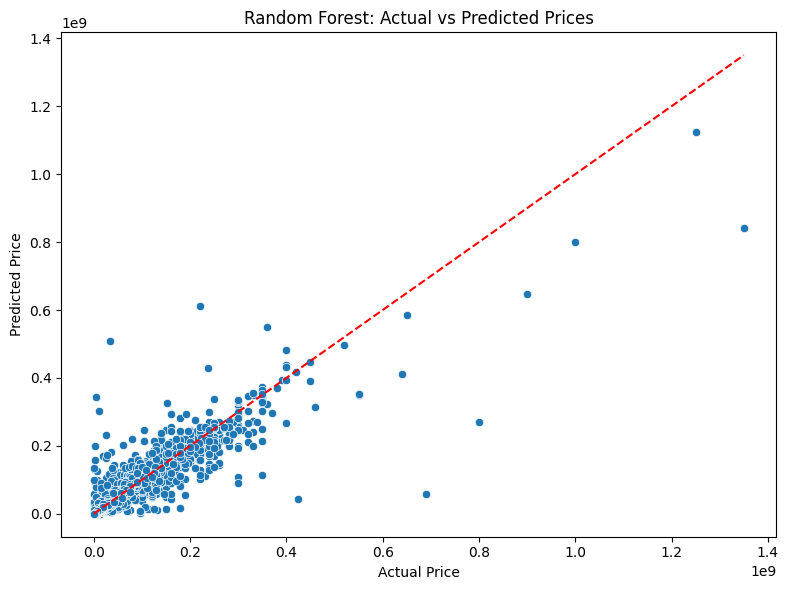

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=rf_model.predict(X_test))
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()


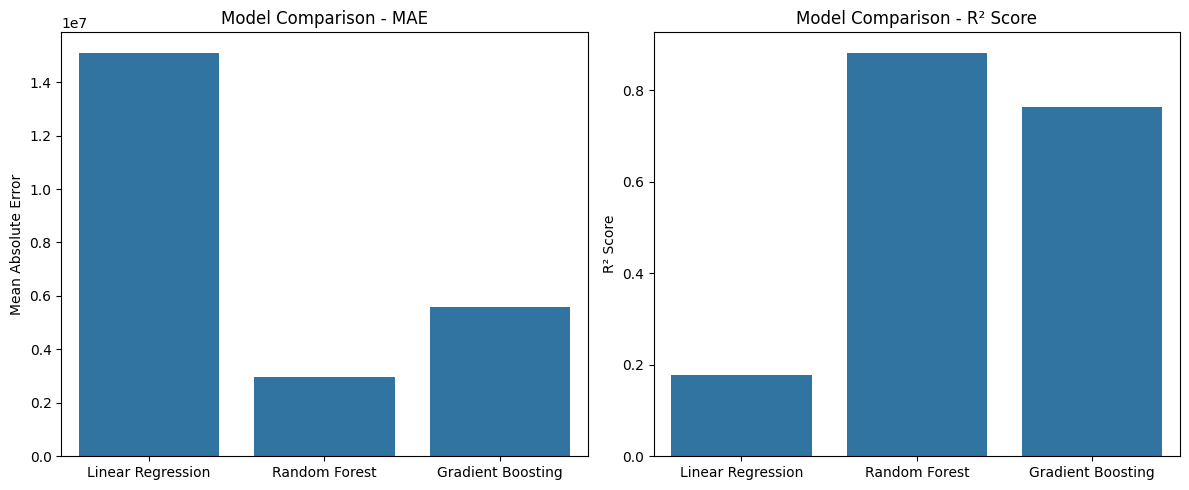

In [28]:
model_names = ["Linear Regression", "Random Forest", "Gradient Boosting"]
mae_scores = [
    mean_absolute_error(y_test, lr_model.predict(X_test)),
    mean_absolute_error(y_test, rf_model.predict(X_test)),
    mean_absolute_error(y_test, gb_model.predict(X_test))
]

r2_scores = [
    r2_score(y_test, lr_model.predict(X_test)),
    r2_score(y_test, rf_model.predict(X_test)),
    r2_score(y_test, gb_model.predict(X_test))
]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=mae_scores)
plt.title("Model Comparison - MAE")
plt.ylabel("Mean Absolute Error")

plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=r2_scores)
plt.title("Model Comparison - R² Score")
plt.ylabel("R² Score")

plt.tight_layout()
plt.show()
